In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('/kaggle/input/salary-prediction-of-data-professions/Salary Prediction of Data Professions.csv')
data.head

<bound method NDFrame.head of      FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F   5-18-2014   01-07-2016         Analyst   
1         ANNIE         NaN   F         NaN   01-07-2016       Associate   
2         OLIVE        ANCY   F   7-28-2014   01-07-2016         Analyst   
3        CHERRY     AQUILAR   F  04-03-2013   01-07-2016         Analyst   
4          LEON  ABOULAHOUD   M  11-20-2014   01-07-2016         Analyst   
...         ...         ...  ..         ...          ...             ...   
2634  KATHERINE      ALSDON   F   6-28-2011   01-07-2016  Senior Manager   
2635     LOUISE     ALTARAS   F   1-14-2014   01-07-2016         Analyst   
2636      RENEE      ALVINO   F   1-23-2014   01-07-2016         Analyst   
2637       TERI   ANASTASIO   F   3-17-2014   01-07-2016         Analyst   
2638    GREGORY      ABARCA   M   9-18-2014   01-07-2016         Analyst   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES REMAI

In [31]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [32]:
data.isna().any()

FIRST NAME          False
LAST NAME            True
SEX                 False
DOJ                  True
CURRENT DATE        False
DESIGNATION         False
AGE                  True
SALARY              False
UNIT                False
LEAVES USED          True
LEAVES REMAINING     True
RATINGS              True
PAST EXP            False
dtype: bool

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [34]:
categorical = [var for var in data.columns if data[var].dtype=='O']
# check missing values in categorical variables

data[categorical].isnull().sum()

FIRST NAME      0
LAST NAME       2
SEX             0
DOJ             1
CURRENT DATE    0
DESIGNATION     0
UNIT            0
dtype: int64

In [35]:
# view frequency counts of values in categorical variables

for var in categorical: 
    print('**************************')
    print(var)
    print('---------------------------')
    print(data[var].value_counts())

**************************
FIRST NAME
---------------------------
FIRST NAME
ELISHA      3
OLLIE       3
JAN         3
FRANKIE     3
WILLIAM     3
           ..
MARC        1
VICKI       1
MARCIA      1
FLETCHER    1
GREGORY     1
Name: count, Length: 2367, dtype: int64
**************************
LAST NAME
---------------------------
LAST NAME
AHHEE          2
ANSON          2
ALLBONES       2
ALAMIN         2
AMAYA          2
              ..
AGOSTINELLI    1
AMBROSINI      1
ANGLUM         1
AKLEY          1
ABARCA         1
Name: count, Length: 2475, dtype: int64
**************************
SEX
---------------------------
SEX
F    1344
M    1295
Name: count, dtype: int64
**************************
DOJ
---------------------------
DOJ
10-19-2013    12
6-24-2013     10
09-08-2014    10
9-28-2013     10
9-18-2014     10
              ..
12-08-2012     1
1-26-2012      1
4-19-2011      1
12-22-2013     1
6-28-2011      1
Name: count, Length: 967, dtype: int64
**************************
CU

In [36]:
data[categorical].head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,Finance
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,Web
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,Finance
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,IT
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,Operations


In [44]:
data['SEX'] = data['SEX'].replace({'F': 0, 'M': 1}).infer_objects()

In [38]:
data[categorical].head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
0,TOMASA,ARMEN,0,5-18-2014,01-07-2016,Analyst,Finance
1,ANNIE,NaN,0,NaN,01-07-2016,Associate,Web
2,OLIVE,ANCY,0,7-28-2014,01-07-2016,Analyst,Finance
3,CHERRY,AQUILAR,0,04-03-2013,01-07-2016,Analyst,IT
4,LEON,ABOULAHOUD,1,11-20-2014,01-07-2016,Analyst,Operations


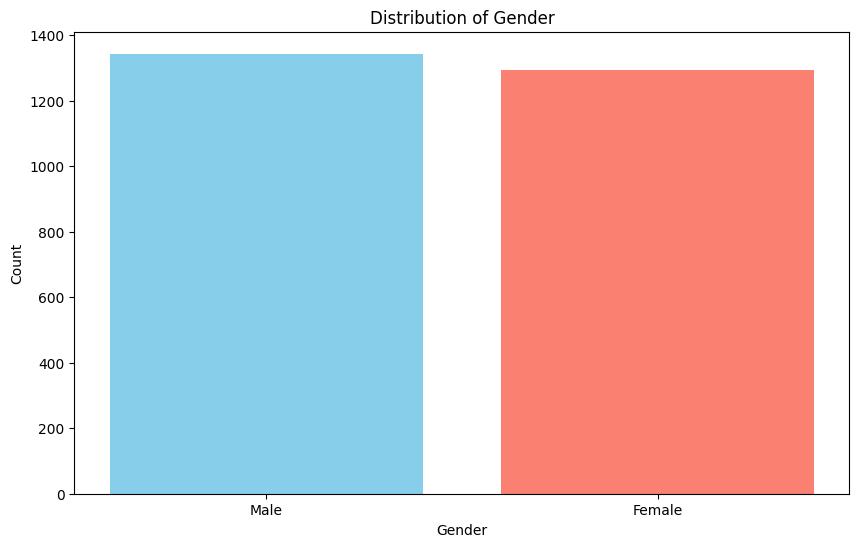

In [39]:
# Assuming 'SEX' is the column name
gender_counts = data['SEX'].value_counts()

# Define custom colors
colors = ['skyblue', 'salmon']

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


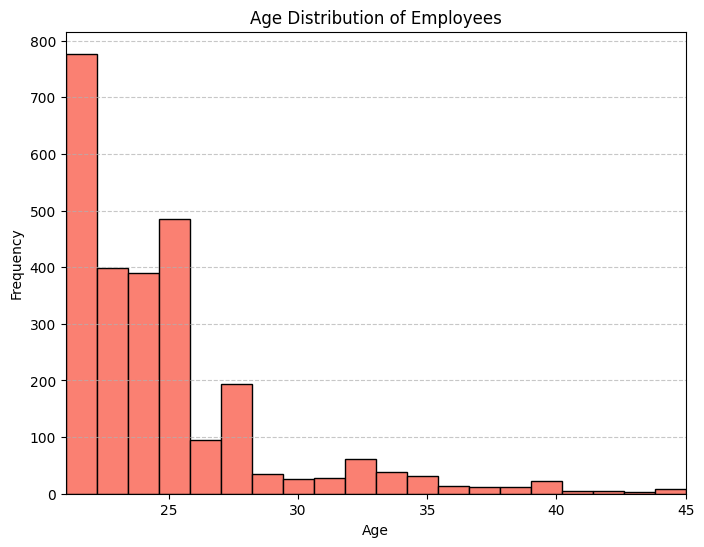

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(data['AGE'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limits to cover the entire age range
plt.xlim(data['AGE'].min(), data['AGE'].max())

plt.show()


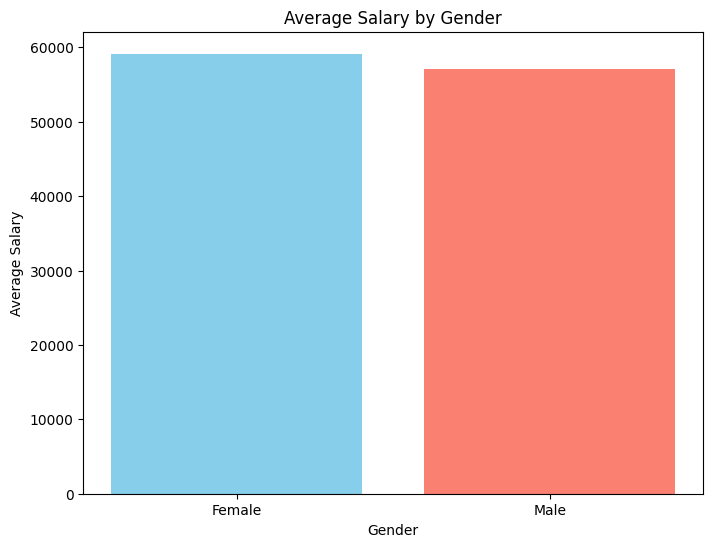

In [41]:
# Assuming 'SEX' is the column name
gender_salary = data.groupby('SEX')['SALARY'].mean()

# Create a bar chart with custom x-axis labels
plt.figure(figsize=(8, 6))
plt.bar(['Female', 'Male'], gender_salary.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender')
plt.show()


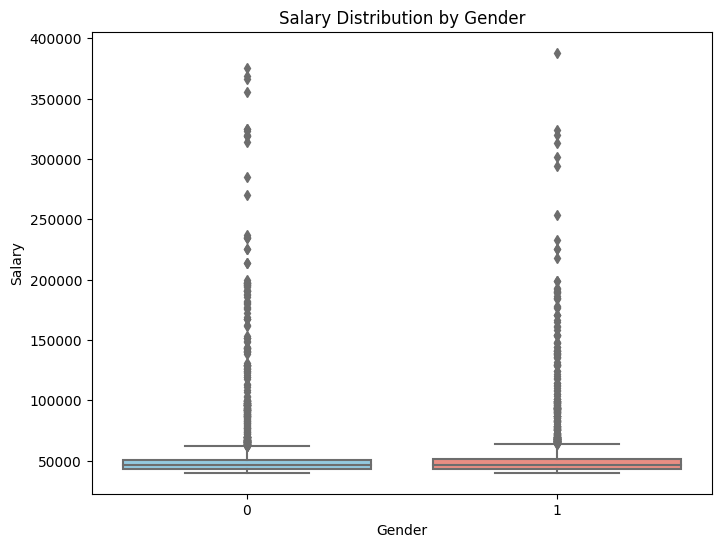

In [42]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='SEX', y='SALARY', data=data, palette=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')
plt.show()